# Flchain Dataset Split

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper 
from torch import nn
import torch 
import torchtuples as tt
from pycox.datasets import flchain
from pycox.models import DeepHitSingle
from pycox.evaluation import EvalSurv

np.random.seed(1234)
_ = torch.manual_seed(123)
random.seed(1234)
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

df = flchain.read_df(processed=False)
df = (df.drop(['chapter'], axis=1).loc[lambda x: x['creatinine'].isna() == False].reset_index(drop=True).assign(sex=lambda x: (x['sex'] == 'M')))
categorical = ['sample.yr', 'flc.grp']
for col in categorical:
    df[col] = df[col].astype('category')
for col in df.columns.drop(categorical):
    df[col] = df[col].astype('float32')

In [3]:
df = df.rename(columns={'futime':'duration', 'death':'event'})
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
max_time = int(df['duration'].max())+1
from sklearn.model_selection import train_test_split
# Set a random seed for reproducibility
random_seed = 41
# Split the DataFrame into train and remaining parts
train_df, remaining_df = train_test_split(df, test_size=0.4, random_state=random_seed)
# Split the remaining part into validation and test sets
val_df, test_df = train_test_split(remaining_df, test_size=0.5, random_state=random_seed)

train_df.to_csv('./dataset/flchain/df_train.csv', index=True)
val_df.to_csv('./dataset/flchain/df_val.csv', index=True)
test_df.to_csv('./dataset/flchain/df_test.csv', index=True)

# SUPPORT Dataset Split

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper 
from torch import nn
import torch
import torchtuples as tt
from pycox.datasets import support
from pycox.models import DeepHitSingle
from pycox.evaluation import EvalSurv

np.random.seed(1234)
_ = torch.manual_seed(123)
random.seed(1234)
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

# load data and split train, valid and test
df_train = support.read_df()
max_time = int(df_train['duration'].max())+1
df_test = df_train.iloc[7098:]
df_train = df_train.drop(df_test.index)
df_val = df_train.sample(frac=0.2)
df_train = df_train.drop(df_val.index)

df_train.to_csv('./dataset/support/df_train.csv', index=True)
df_val.to_csv('./dataset/support/df_val.csv', index=True)
df_test.to_csv('./dataset/support/df_test.csv', index=True)

# SEER-BC Dataset Generation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('./dataset/seer_bc/seer_processed.csv')
df1 = df.drop(["event_heart"],axis=1)
df1 = df1.rename(columns={'event_breast': 'event'})

# Set a random seed for reproducibility
random_seed = 42
# Split the DataFrame into train and remaining parts
train_df, remaining_df = train_test_split(df1, test_size=0.4, random_state=random_seed)
# Split the remaining part into validation and test sets
val_df, test_df = train_test_split(remaining_df, test_size=0.5, random_state=random_seed)

In [4]:
train_df.to_csv('./dataset/seer_bc/df_train.csv', index=True)
val_df.to_csv('./dataset/seer_bc/df_val.csv', index=True)
test_df.to_csv('./dataset/seer_bc/df_test.csv', index=True)

# SEER-HD Dataset Generation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
df = pd.read_csv('./dataset/seer_bc/seer_processed_hd.csv')
df1 = df.drop(["event_breast"],axis=1)
df1 = df1.rename(columns={'event_heart': 'event'})
df1 = df1[df1['event']==1]

df1.to_csv('./dataset/seer_bc/df_test_hd.csv', index=True)

df_test_noise = pd.read_csv('./dataset/seer_bc/df_test_hd.csv')
np.random.seed(1234)
random.seed(1234)
df_test = pd.read_csv('./dataset/seer_bc/df_test.csv')
n_sample = int(df_test['event'].sum())
df_test_noise = df_test_noise.sample(n=n_sample, random_state=0) 
df_test_noise.to_csv('./dataset/seer_bc/df_test_noise.csv')

# Synthetic Dataset Generation

In [5]:
### Sourced from Continuous and Discrete-Time Survival Prediction with Neural Networks, https://arxiv.org/pdf/1910.06724
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from pycox.simulations import SimStudySACCensorConst

np.random.seed(1234)
random.seed(1234)

# Setting the number of samples
n = 100000
# Creating an instance of the simulation class
sim = SimStudySACCensorConst()
# Simulating the data with survival curves
data = sim.simulate(n, surv_df=True)
# Extracting the survival curves from the simulation data
surv_df = data['surv_df']
surv_curves = pd.DataFrame(surv_df)

df = sim.dict2df(data, False, False)
df = sim.dict2df(data, True, False)

df.to_csv('./dataset/sac3/df_compelte.csv', index=True)

surv_curves.to_csv('./dataset/sac3/df_surv_curves.csv', index=True)

df = pd.read_csv('./dataset/sac3/df_compelte.csv')
# # Set a random seed for reproducibility
random_seed = 42
# Split the DataFrame into train and remaining parts
train_df, remaining_df = train_test_split(df, test_size=0.4, random_state=random_seed)
# Split the remaining part into validation and test sets
val_df, test_df = train_test_split(remaining_df, test_size=0.5, random_state=random_seed)

train_df.to_csv('./dataset/sac3/df_train.csv', index=True)
val_df.to_csv('./dataset/sac3/df_val.csv', index=True)
test_df.to_csv('./dataset/sac3/df_test.csv', index=True)

In [39]:
test_df=pd.read_csv('./dataset/sac3/df_test.csv')
df=pd.read_csv('./dataset/sac3/df_surv_curves.csv')

In [56]:
df_surv_test = df.loc[:, ['Unnamed: 0']+[str(x) for x in sorted(list(test_df['Unnamed: 0']))]]
df_surv_test.to_csv('./dataset/sac3/df_surv_curves_test.csv', index=True)

In [59]:
df_surv_test = pd.read_csv('./dataset/sac3/df_surv_curves_test.csv')

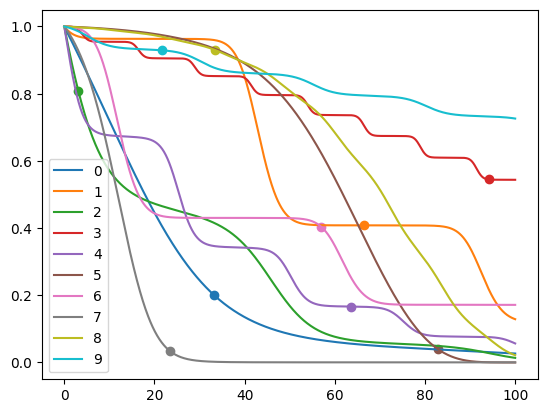

In [6]:
for i in range(10):
    plt.plot(surv_curves[i], label=str(i))
    plt.scatter(df['duration'][i], surv_curves[i].values[int(df['duration'][i]/0.1)], marker='o')
plt.legend()